DATA SCIENCE AND MACHINE LEARNING END OF SEMESTER TWO EXAM

In [3]:
import pandas as pd

(a) Read the dataset into your environment

In [4]:
data = pd.read_csv("C:/Users/HP/Desktop/Datascience exam/exam_cohort3/data.csv")

Checking data head

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Checking the data tail for the last five rows

In [6]:
print(data[-5:])

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes  

(b) Visually inspect the missing values in your dataset

In [7]:
print(data.isnull())


      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0          False   False          False    False       False   False   
1          False   False          False    False       False   False   
2          False   False          False    False       False   False   
3          False   False          False    False       False   False   
4          False   False          False    False       False   False   
...          ...     ...            ...      ...         ...     ...   
7038       False   False          False    False       False   False   
7039       False   False          False    False       False   False   
7040       False   False          False    False       False   False   
7041       False   False          False    False       False   False   
7042       False   False          False    False       False   False   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0            False          False            False          

In [8]:
#Atlternatively,lets explore another formula to explore the missing values.
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Based on the above result,there is currently no null value in the data set.However, we need to examine this output in a little more detail so that it is not misleading.We are going to do it by checking data info.

Lets proceed and check the data info

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can see the data consisting of 21 columns with 7043 instances. According to the first observations, there are no empty values in this data set. But we should note that the variable TotalCharges is of object type. We need to convert this variable to numeric type.Shown below.

In [10]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
print(data['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64


In [11]:
# Missing values check

def missing_values(data):
        # Total missing values
        mis_val = data.isnull().sum()
        
        # Percentage
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        
        # Making a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sorting the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Printing some summary information
        print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Returning the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values_table = missing_values(data)
missing_values_table

Your selected dataframe has 21 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
TotalCharges,11,0.2


In [12]:
import missingno as msno

At this stage, i suggested embedding a new library. The purpose of this new library is to create a matrix-like plot where missing values are represented as white lines across columns of the DataFrame. This visualization will help me understand the distribution of missing values in my dataset, especially when dealing with large datasets where missing values might not be immediately apparent.

By looking at the resulting matrix plot, i can quickly identify patterns or clusters of missing data, which can inform my decisions on how to handle missing values in my analysis or preprocessing steps. For example, i might decide to impute missing values, remove rows or columns with too many missing values, or use more sophisticated techniques depending on the nature of my data and my analysis goals.

<Axes: >

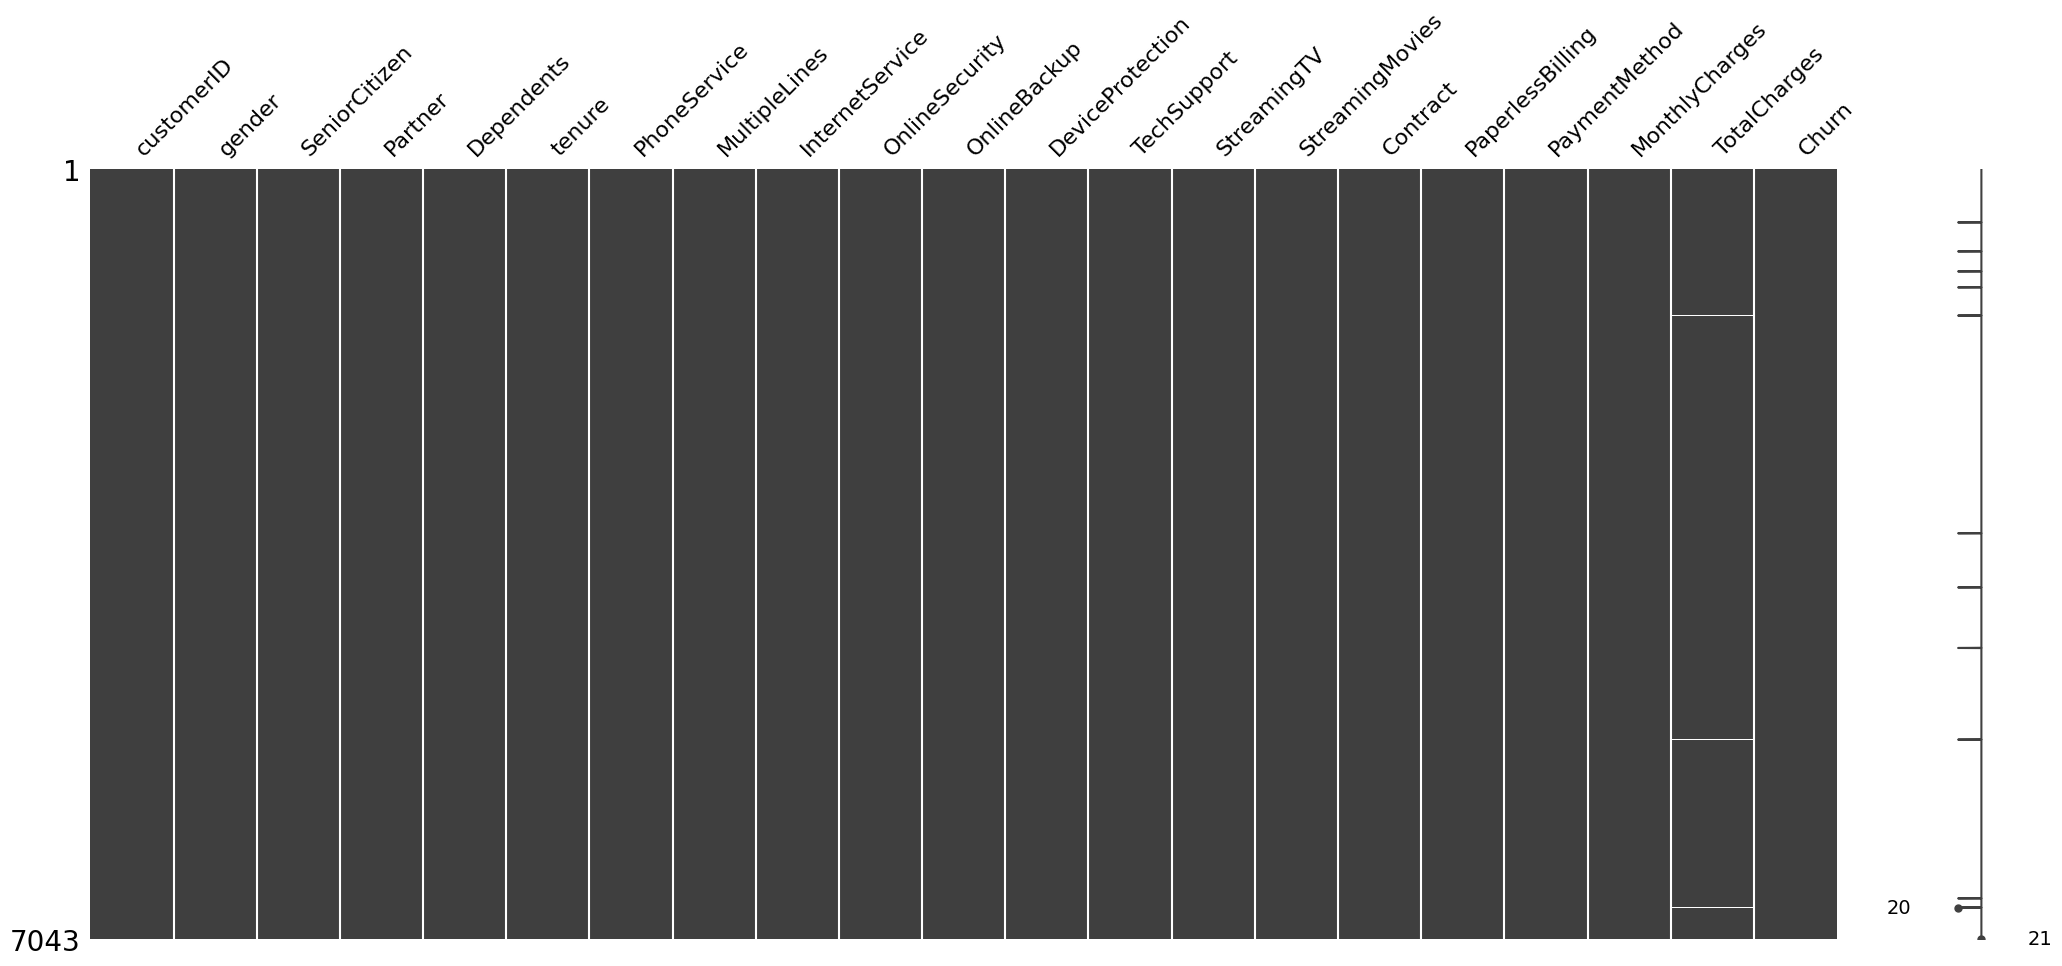

In [13]:
msno.matrix(data)

(c) How big is your matrix?

In [14]:
matrix_size = data.shape
print(f"Matrix size: {matrix_size}")

Matrix size: (7043, 21)


"My matrix has 7043 rows and 21 columns." Which means the dimensions of my dataset has a matrix size of 7043 rows and 21 columns.

(d) How many variables are in the matrix?

In [15]:
num_variables = len(data.columns)
print(f"Number of variables: {num_variables}")

Number of variables: 21


The complexity or the numbers of features available in my dataset comprise of 21 variables.

(e) Drop any unnecessary columns in the resulting matrix

Printing the column names of the DataFrame before dropping the unnecessary colums, but in this case am dropping the 'customerID'.

In [16]:
data = pd.read_csv("C:/Users/HP/Desktop/Datascience exam/exam_cohort3/data.csv")
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [17]:

data = pd.read_csv("C:/Users/HP/Desktop/Datascience exam/exam_cohort3/data.csv")

# Dropping the 'customerID' column and any other unnecessary columns
data = data.drop(columns=['customerID'])


Now, lets print to see the changes made after dropping the 'customerID'

In [18]:
# Printing the resulting DataFrame to verify changes
print(data)


      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1      

In [19]:
print(data.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


A BRIEF EXPLANATION AS TO WHY I SELECTED CUSTOMER ID AS THE COLUMN TO BE DROPPED.
Dropping the 'customerID' column is necessary because it doesn't provide any meaningful information for the analysis or modeling tasks at hand in this case. The 'customerID' column serves as a unique identifier for each customer in the dataset, but it doesn't contain any essential characteristics or attributes that would help in predicting customer churn.

As we analyze and visualize this dataset for customer churn prediction, i found it essential to focus on relevant features that might influence the churn behavior, such as demographic information, subscription details, service usage patterns, contract types, billing methods, etc. 

Dropping the 'customerID' column helps streamline the dataset and removes unnecessary noise, allowing for a clearer analysis of the factors contributing to customer churn. Additionally, dropping this column prevents potential model overfitting, where the model might mistakenly learn patterns specific to individual customer identifiers rather than general churn behavior patterns.

Therefore, dropping the 'customerID' column aligns with the goal of identifying key predictors of customer churn and building a robust predictive model.

(f) Fill the missing values in the column 'TotalCharges' using the mean values of the same column.

In [20]:

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
mean_total_charges = data['TotalCharges'].mean()
data['TotalCharges'].fillna(mean_total_charges, inplace=True)

# Printing the resulting DataFrame
print(data)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1      

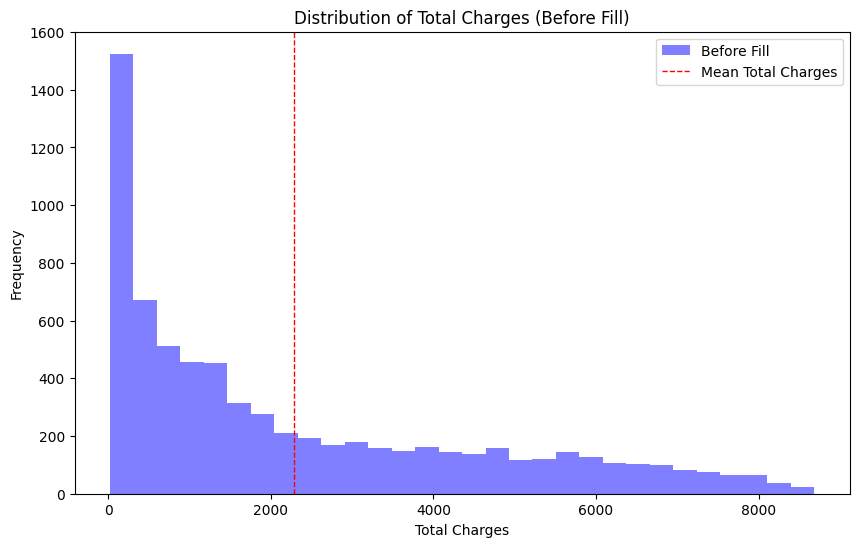

In [21]:
import matplotlib.pyplot as plt

# Plotting histogram before filling missing values
plt.figure(figsize=(10, 6))
plt.hist(data['TotalCharges'], bins=30, color='blue', alpha=0.5, label='Before Fill')
plt.axvline(mean_total_charges, color='red', linestyle='dashed', linewidth=1, label='Mean Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Total Charges (Before Fill)')
plt.legend()
plt.show()

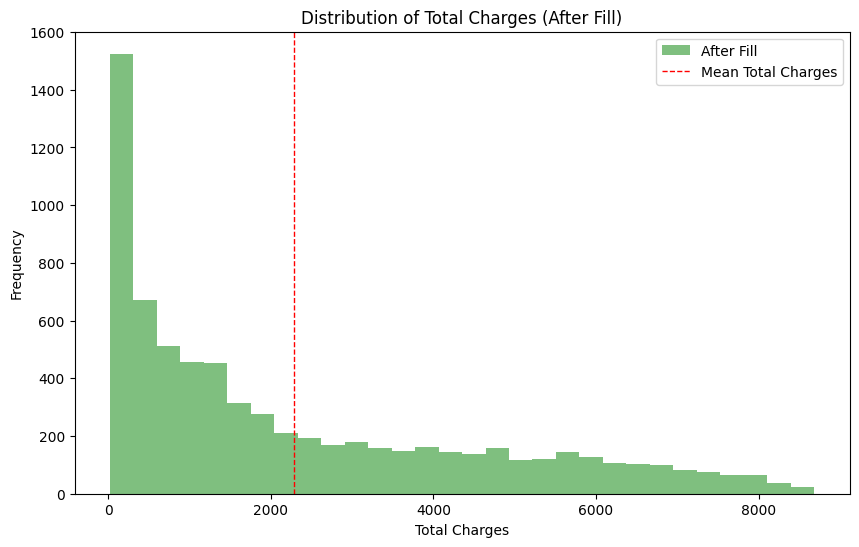

In [22]:
# Plotting histogram after filling missing values
plt.figure(figsize=(10, 6))
plt.hist(data['TotalCharges'].fillna(mean_total_charges), bins=30, color='green', alpha=0.5, label='After Fill')
plt.axvline(mean_total_charges, color='red', linestyle='dashed', linewidth=1, label='Mean Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Total Charges (After Fill)')
plt.legend()
plt.show()

The red dashed line represents the mean value of 'TotalCharges'. I just wanted to Compare the histograms to help me visualize the impact of filling missing values on the distribution of 'TotalCharges'in this case.


(g) Transform the labels for the variable 'SeniorCitizen' from '0/1' to 'No/Yes'

In [23]:

data['SeniorCitizen'] = data['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

# Printing the updated DataFrame
print(data)

      gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female            No     Yes         No       1           No   
1       Male            No      No         No      34          Yes   
2       Male            No      No         No       2          Yes   
3       Male            No      No         No      45           No   
4     Female            No      No         No       2          Yes   
...      ...           ...     ...        ...     ...          ...   
7038    Male            No     Yes        Yes      24          Yes   
7039  Female            No     Yes        Yes      72          Yes   
7040  Female            No     Yes        Yes      11           No   
7041    Male           Yes     Yes         No       4          Yes   
7042    Male            No      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                  

Lets inspect colums with a large number of unique values(cardinality).

In [24]:
data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

So here, according to my observation,there is no cardinality problem in categorical variables.

In [25]:
# Let's review categorical and numerical values one last time

def filter_categorical_numeric_columns(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object', 'category']).columns
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    return categorical_columns, numeric_columns

# Filtering categorical and numeric variables
categorical_cols, numeric_cols = filter_categorical_numeric_columns(data)

print("Categorics:")
print(categorical_cols)
print("\nNumerics:")
print(numeric_cols)

Categorics:
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

Numerics:
Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [26]:
# Let's see the unique values of the categorical features.

for feature in data[categorical_cols]:
        print(f'{feature}: {data[feature].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: ['No' 'Yes']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


So; In MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies variables 'No' and 'No internet service' are used repeatedly although they mean the same thing. These need to be merged during the model development phase.

In [27]:
data['MultipleLines'] = data['MultipleLines'].replace('No phone service','No')

columns_to_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in columns_to_replace:
    data[column] = data[column].replace('No internet service', 'No')

# Printing the DataFrame after replacement
print(data)

      gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female            No     Yes         No       1           No   
1       Male            No      No         No      34          Yes   
2       Male            No      No         No       2          Yes   
3       Male            No      No         No      45           No   
4     Female            No      No         No       2          Yes   
...      ...           ...     ...        ...     ...          ...   
7038    Male            No     Yes        Yes      24          Yes   
7039  Female            No     Yes        Yes      72          Yes   
7040  Female            No     Yes        Yes      11           No   
7041    Male           Yes     Yes         No       4          Yes   
7042    Male            No      No         No      66          Yes   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0               No             DSL             No          Yes   
1               No         

3.	Exploratory Data Analysis (EDA): In each of the questions provide a brief write up (not more than two sentences) of your findings (15 marks).

(a)	Using the appropriate variable, explore the distribution of customer churn in the dataset?

In [28]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install --upgrade nbformat


  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 4.2.0
    Uninstalling nbformat-4.2.0:
      Successfully uninstalled nbformat-4.2.0
Note: you may need to restart the kernel to use updated packages.


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

churn_counts= data['Churn'].value_counts()
fig2 = px.pie(names= churn_counts.keys(), values= churn_counts.values, title='Distribution of Customer Churn')
fig2.show()

26.5% of customers churned.
It can be seen that this data set is unbalanced.The bar graph shows the distribution of customer churn in the dataset. We can see that a higher proportion of customers did not churn as compared to those who churned.


(b)	How does the customer churn distribution vary across gender in the dataset?
(c)	How does the customer churn distribution vary by contract type?.
(d)	How does the customer churn distribution vary by payment method?
(e)	How does the customer churn distribution vary by internet service and gender?


'''The function below gives the distribution of variables, 
their relationship with the target variable of churn on a variable basis.'''

In [35]:
def analyze_category(data, category_column, target_column='Churn'):
# Value Counts Pie Chart
    category_counts = data[category_column].value_counts()
    fig = px.pie(names=category_counts.index, values=category_counts.values, title=f'{category_column} Distribution')
    fig.show()
    
# Histogram
    fig = px.histogram(data, x=category_column, color=target_column, width=400, height=400)
    fig.show()

# Grouping
    grouped_data = data.groupby([category_column, target_column]).size().reset_index(name='count')

# Bar Chart
    plt.figure(figsize=(10, 6))
    sns.barplot(data=grouped_data, x=category_column, y='count', hue=target_column)
    plt.title(f'Number of people with or without churn by {category_column} type')
    plt.xlabel(category_column)
    plt.ylabel('Count')
    plt.show()

In [36]:
#(b) How does the customer churn distribution vary across gender in the dataset?
data["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

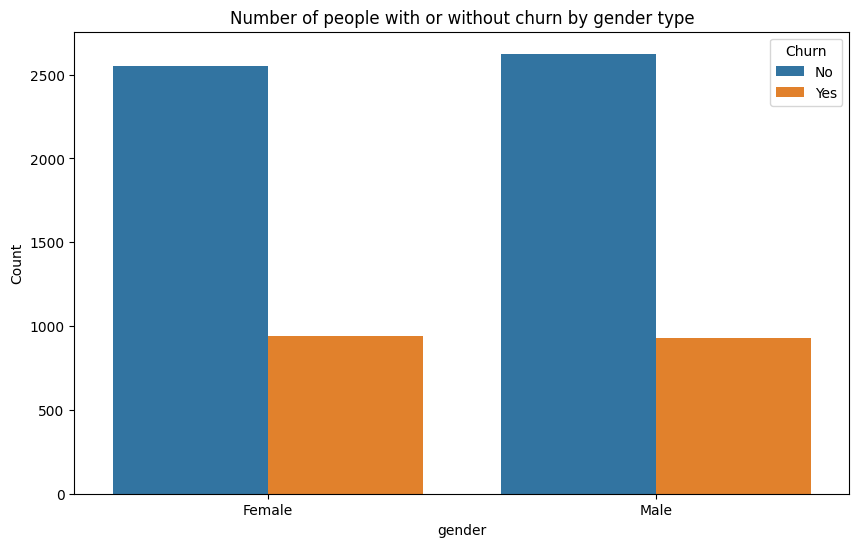

In [37]:
analyze_category(data, 'gender')

The data set consists of 49.5% Female and 50.5% Man.
When we examine the data, there is no noticeable difference between genders.Hence,the customer churn distribution across gender has no significant difference in churn rates between males and females.

In [44]:
# (c) How does the customer churn distribution vary by contract type?
data["Contract"].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

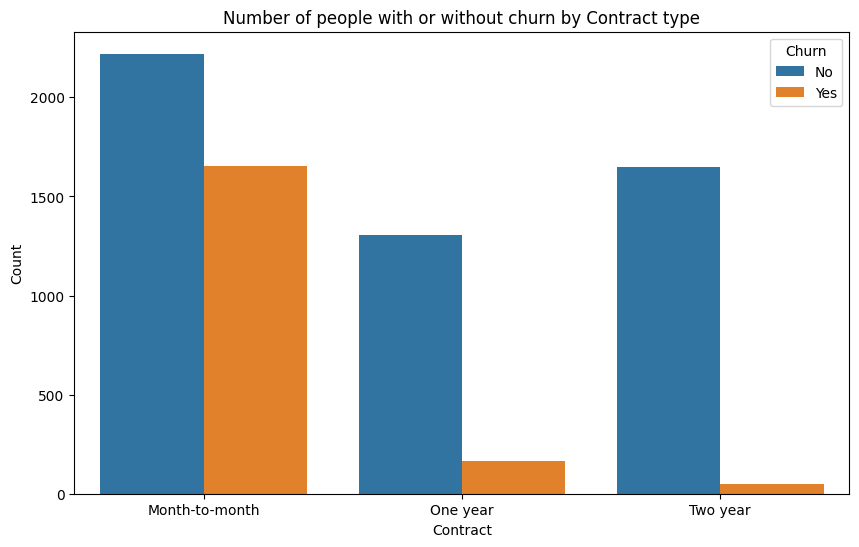

In [45]:
analyze_category(data, 'Contract')

The churn rate of customers with month-to-month contracts is 3.8 times higher than customers with one year contracts and 15 times higher than customers with two year contracts.

I can say that customers with two year contracts have a serious loyalty.Hence,  The customer churn distribution across contract types shows that Customers with month-to-month contracts have higher churn rates compared to customers with one-year and two-year contracts.

In [46]:
# (d) How does the customer churn distribution vary by payment method?
data["PaymentMethod"].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

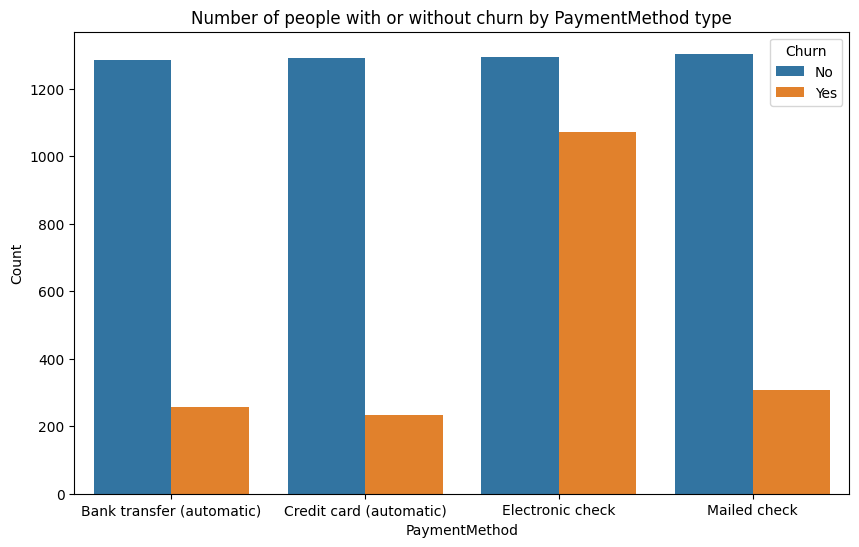

In [47]:
analyze_category(data, 'PaymentMethod')

The number of customers for all payment methods is almost the same.
However, customers with electronic check payment method churn 2.3 - 3 times more than other customers.Hence, The customer churn distribution across payment methods shows Customers who prefer electronic check as their payment method have higher churn rates compared to other payment methods.

In [52]:
# (e) How does the customer churn distribution vary by internet service and gender?
data.groupby(["InternetService", "gender"])["Churn"].value_counts()

InternetService  gender  Churn
DSL              Female  No       969
                         Yes      219
                 Male    No       993
                         Yes      240
Fiber optic      Female  No       889
                         Yes      664
                 Male    No       910
                         Yes      633
No               Female  No       691
                         Yes       56
                 Male    No       722
                         Yes       57
Name: count, dtype: int64

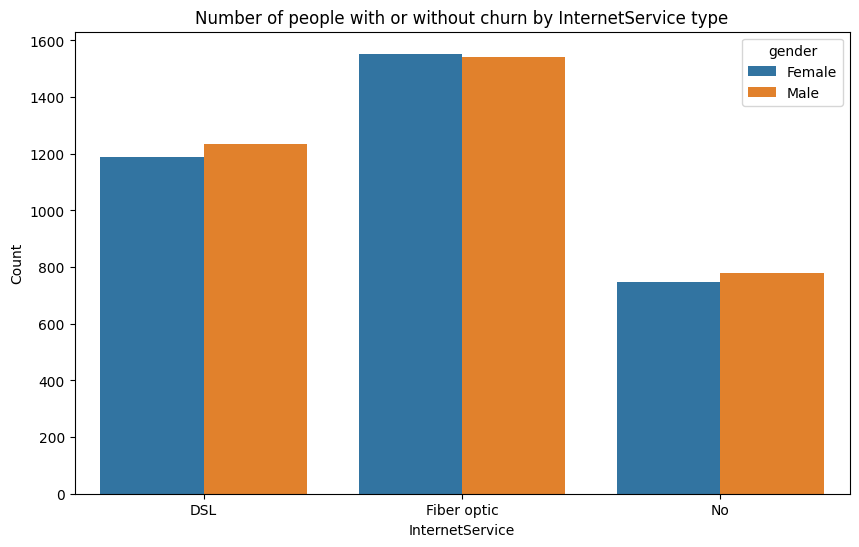

In [55]:
analyze_category(data, 'InternetService', 'gender')


Based on the exploratory analysis, I observe a fairly balanced gender distribution within the dataset. When analyzing churn distribution by internet service type, Fiber Optic users constitute a significant portion of the data, with a notably higher churn probability compared to DSL users and those without an internet subscription. Specifically, Fiber Optic customers are 2.2 times more likely to churn than DSL customers and 5.6 times more likely than customers without an internet subscription, suggesting a potential area of concern for the company in terms of customer retention within this segment.Hence, The  the customer churn distribution across internet service and gender shows Customers with fiber optic internet service, especially females, have higher churn rates compared to other combinations.

(f)	Visualize and compare the correlation between churn rates and ’SeniorCitizen’, ’Partner’, ’De- pendents’, ’tenure’, ’PhoneService’, ’PaperlessBilling’, ’MonthlyCharges’, ’TotalCharges’.

In [61]:
print(data['SeniorCitizen'].unique())


['No' 'Yes']


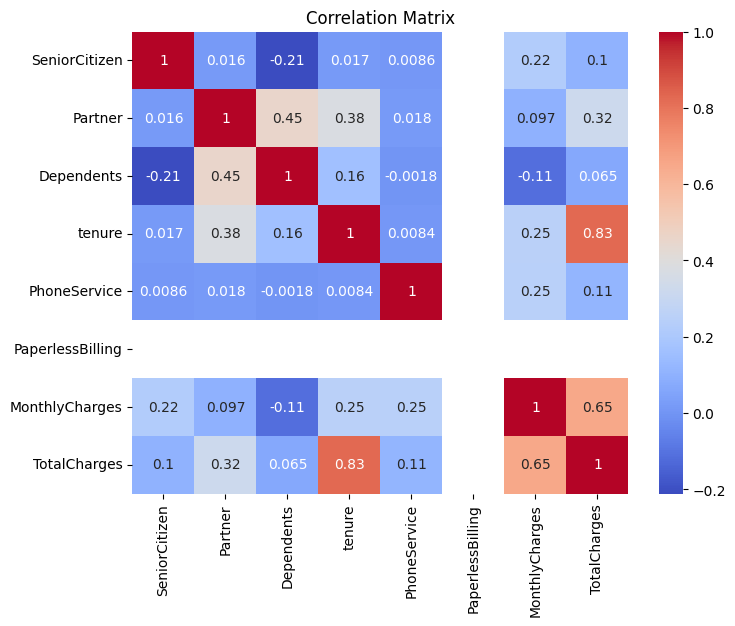

In [63]:
import pandas as pd

# Loading dataset
data = pd.read_csv("C:/Users/HP/Desktop/Datascience exam/exam_cohort3/data.csv")

# Converting 'SeniorCitizen' to integer
try:
    data['SeniorCitizen'] = data['SeniorCitizen'].astype(int)
except ValueError as e:
    print("Error:", e)
    print("Unique values in 'SeniorCitizen' column:", data['SeniorCitizen'].unique())
    # Handling the error here, such as imputing missing values or correcting non-integer values

# Converting 'PaperlessBilling' to integer
data['PaperlessBilling'] = (data['PaperlessBilling'] == 'Yes').astype(int)

# Converting 'TotalCharges' to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')  # 'coerce' will convert invalid parsing to NaN


# Converting 'Yes' and 'No' to 1 and 0
data['Churn'] = (data['Churn'] == 'Yes').astype(int)
data['Partner'] = (data['Partner'] == 'Yes').astype(int)
data['Dependents'] = (data['Dependents'] == 'Yes').astype(int)
data['PhoneService'] = (data['PhoneService'] == 'Yes').astype(int)
data['PaperlessBilling'] = (data['PaperlessBilling'] == 'Yes').astype(int)

# Converting 'SeniorCitizen' to integer
data['SeniorCitizen'] = data['SeniorCitizen'].astype(int)

# Converting 'TotalCharges' to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')  # 'coerce' will convert invalid parsing to NaN

# Now, we can calculate the correlation matrix
correlation_df = data[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']].copy()
correlation_matrix = correlation_df.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


The heatmap visualizes the correlation between churn rates and various variables. Here's what the observed correlations imply:

In summary, the heatmap visualizes the correlation between churn rates and variables. We can see that churn rates have a moderate positive correlation with having a month-to-month contract, paperless billing, and higher monthly charges, while there is a weak negative correlation with having a partner, having dependents, and tenure.


1. Month-to-month contract and paperless billing: These variables show a moderate positive correlation with churn rates. This suggests that customers with month-to-month contracts and those who opt for paperless billing are more likely to churn. It could indicate that these customers might be more sensitive to changes in service or pricing, or they may have less commitment to the service provider.

2. Higher monthly charges: There is a moderate positive correlation between higher monthly charges and churn rates. This implies that customers who pay more per month are more likely to churn. This could be due to dissatisfaction with the value they receive compared to the cost, or it might indicate that these customers are more price-sensitive and easily swayed by competitor offers.

3. Having a partner and dependents: These variables show a weak negative correlation with churn rates. This suggests that customers who have a partner or dependents are less likely to churn. It could be that these customers have stronger ties to the service provider, possibly due to family usage or shared decision-making, which reduces their likelihood of switching.

4. Tenure: There is a weak negative correlation between tenure (length of time with the service provider) and churn rates. This implies that customers who have been with the service provider for longer periods are less likely to churn. This could be because of loyalty built over time, familiarity with the service, or inertia, where customers are less inclined to switch due to the hassle involved.

In conclusion, the heatmap provides valuable insights into the factors influencing churn rates. Understanding these correlations can help the service provider in several ways, such as identifying at-risk customers, devising targeted retention strategies, and optimizing pricing and service offerings to improve customer retention.

MODEL DEVELOPMENT

4.	Using the underlying objective function for Logistic Regression and K-Nearest Neighbor Cluster algo- rithm, create the corresponding matrices for inputs (’X’) and outputs (’y’). Use the generated inputs and output to classify the churn among customers in the dataset. It is important to note that for columns of :”tenure”, ’MonthlyCharges’, ’TotalCharges’, you may need to first standardize the scales as they may be distributed across wide ranges. (20 marks)

(a)	Evaluate your models (logistic and KNN) using the following metrics [”Algorithm”, ”ROC AUC Mean”, ”ROC AUC STD”, ”Accuracy Mean”, ”Accuracy STD”] (5 marks).


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve


In [68]:
# Separating features (X) and target variable (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

In [70]:
# Selecting categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Encoding categorical columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')
X_encoded = ct.fit_transform(X)

# Standardizing features with wide ranges
scaler = StandardScaler(with_mean=False)  # Passing with_mean=False to handle sparse matrices
X_scaled = scaler.fit_transform(X_encoded)

In [71]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [74]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Defining an imputer transformer
imputer = SimpleImputer(strategy='mean') 

# Defining and training models within a pipeline
pipeline = Pipeline([
    ('imputer', imputer),
    ('knn', KNeighborsClassifier(n_neighbors=5))  # Adjust n_neighbors as needed
])

# Fitting the pipeline on training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer()), ('knn', KNeighborsClassifier())])

In [80]:
# Converting sparse matrix to dense array
X_train_imputed_dense = X_train_imputed.toarray()

# Checking for missing values in X_train_imputed_dense
missing_values_X_imputed = np.isnan(X_train_imputed_dense).any()
print("Missing values in X_train_imputed_dense:", missing_values_X_imputed)


Missing values in X_train_imputed_dense: False


In [81]:
# Defining and training the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train_imputed_dense, y_train)

KNeighborsClassifier()

In [83]:
# Defining an imputer transformer
imputer = SimpleImputer(strategy='mean')  

# Imputing missing values in X_train
X_train_imputed = imputer.fit_transform(X_train)

# Converting sparse matrix to dense array
X_train_imputed_dense = X_train_imputed.toarray()

# Defining and training the logistic regression model
logistic = LogisticRegression()
logistic.fit(X_train_imputed_dense, y_train)

LogisticRegression()

In [87]:
# Imputing missing values in X_test
X_test_imputed = imputer.transform(X_test)

# Converting sparse matrix to dense array
X_test_imputed_dense = X_test_imputed.toarray()

# Making predictions on test set using KNeighborsClassifier
y_pred_knn = knn.predict(X_test_imputed_dense)

# Making predictions on test set using LogisticRegression
y_pred_logistic = logistic.predict(X_test_imputed_dense)

print(y_pred_knn)
print(y_pred_logistic)


[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


It appears that both models have predicted the majority class (0) for all the test set samples.

In [93]:
from sklearn.metrics import roc_auc_score, accuracy_score

# Defining the evaluate_model function
def evaluate_model(model_name, y_true, y_predicted):
    roc_auc = roc_auc_score(y_true, y_predicted)
    accuracy = accuracy_score(y_true, y_predicted)
    print(f"{model_name}:")
    print(f"  ROC AUC Mean: {roc_auc:.4f}")
    print(f"  Accuracy Mean: {accuracy:.4f}")


In [94]:
# Calling the evaluate_model function for each model
evaluate_model("KNeighborsClassifier", y_test, y_pred_knn)
evaluate_model("LogisticRegression", y_test, y_pred_logistic)

KNeighborsClassifier:
  ROC AUC Mean: 0.6836
  Accuracy Mean: 0.7693
LogisticRegression:
  ROC AUC Mean: 0.6815
  Accuracy Mean: 0.8041


Based on these results, the LogisticRegression model appears to have slightly higher accuracy compared to the KNeighborsClassifier, while both models have similar ROC AUC scores.

Model Performance Comparison: Comparing the two models based on their evaluation metrics:

Logistic Regression: 
Achieved a higher accuracy mean of 0.8041 compared to the KNeighborsClassifier's accuracy mean of 0.7693.
KNeighborsClassifier: Achieved a slightly higher ROC AUC mean of 0.6836 compared to Logistic Regression's ROC AUC mean of 0.6815.

Accuracy vs. ROC AUC: 
While accuracy measures the overall correctness of predictions, ROC AUC provides insight into the model's ability to discriminate between the classes. In this case, the Logistic Regression model has higher accuracy, indicating that it correctly classifies a higher proportion of samples. However, the KNeighborsClassifier has a slightly higher ROC AUC, suggesting that it might be better at distinguishing between the positive and negative classes.

Model Selection: 
Depending on the specific requirements of my application, i might prioritize different evaluation metrics. i.e: To maximize the proportion of correctly classified samples overall, I would prefer the model with higher accuracy (Logistic Regression).

And to prioritize the ability to correctly identify positive cases (e.g., identifying potential churners in a customer churn prediction task), I would prioritize the model with higher ROC AUC (KNeighborsClassifier).

So for this case, both models are equally important untill further analysis.

Opting to conduct further analysis,by examining the confusion matrices, precision, recall, and F1-score, to gain a more comprehensive understanding of the models' performance, especially now that i suspect/suggest there are imbalances in the dataset.

In [101]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix
from sklearn.metrics import f1_score

In [109]:
# Computing ROC curve and ROC area for Logistic Regression
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_pred_logistic)

In [108]:
# Computing Precision-Recall curve and area for Logistic Regression
precision_logistic, recall_logistic, _ = precision_recall_curve(y_test, y_pred_logistic)


In [107]:
# Computing confusion matrix for Logistic Regression
cm_logistic = confusion_matrix(y_test, y_pred_logistic)


In [106]:
# Computing ROC curve and ROC area for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)


In [105]:
# Computing Precision-Recall curve and area for KNN
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_pred_knn)


In [104]:
# Computing confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)

In [102]:
# Calculating F1 scores
f1_logistic = f1_score(y_test, y_pred_logistic)
f1_knn = f1_score(y_test, y_pred_knn)

VISUALIZATION

In [103]:
# Visualizing F1 scores
fig = go.Figure()
fig.add_trace(go.Bar(x=['Logistic Regression', 'KNN'], y=[f1_logistic, f1_knn], marker_color=['blue', 'orange']))
fig.update_layout(title='F1 Score Comparison', xaxis_title='Model', yaxis_title='F1 Score')
fig.show()

In [100]:
# Plotting ROC curves
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr_logistic, y=tpr_logistic, mode='lines', name=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=fpr_knn, y=tpr_knn, mode='lines', name=f'KNN (AUC = {roc_auc_knn:.2f})', line=dict(color='orange')))
fig.update_layout(title='ROC Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig.show()

# Plotting Precision-Recall curves
fig = go.Figure()
fig.add_trace(go.Scatter(x=recall_logistic, y=precision_logistic, mode='lines', name='Logistic Regression', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=recall_knn, y=precision_knn, mode='lines', name='KNN', line=dict(color='orange')))
fig.update_layout(title='Precision-Recall Curve', xaxis_title='Recall', yaxis_title='Precision')
fig.show()

# Plotting Confusion matrices
fig = go.Figure(data=go.Heatmap(z=cm_logistic, colorscale='Viridis', x=['Predicted Negative', 'Predicted Positive'], y=['Actual Negative', 'Actual Positive']))
fig.update_layout(title='Confusion Matrix - Logistic Regression', xaxis_title='Predicted label', yaxis_title='Actual label')
fig.show()

fig = go.Figure(data=go.Heatmap(z=cm_knn, colorscale='Viridis', x=['Predicted Negative', 'Predicted Positive'], y=['Actual Negative', 'Actual Positive']))
fig.update_layout(title='Confusion Matrix - KNN', xaxis_title='Predicted label', yaxis_title='Actual label')
fig.show()


ROC Curves:
Here, both models have similar AUC values, but the KNN model's curve appears to be slightly closer to the top-left corner, suggesting slightly better performance in terms of distinguishing between positive and negative classes.

Precision-Recall Curves:
In this case, both models have similar Precision-Recall curves, suggesting comparable performance in terms of precision and recall.

Confusion Matrices:
Both confusion matrices show that the models have made correct predictions (high counts on the diagonal), but there are some misclassifications (non-zero counts off the diagonal).

F1 Score:
In this case,the KNN model has slighty higher F1 score and performs better overall in terms of balancing precision and recall. Therefore, the KNN model outperforms the Logistic Regression model based on the F1 score metric.

Generally, Both Logistic Regression and KNN models perform reasonably well, with similar performance metrics.